# Sign Language detection using CNN (hello, bye)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


## preprocessing the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# Define train_dir and test_dir based on your dataset structure
# Replace these with the actual paths to your training and testing data
train_dir = '/content/drive/MyDrive/ISL_data2/train'
test_dir = '/content/drive/MyDrive/ISL_data2/test'


train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                            batch_size=1,
                                            class_mode="binary")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=1,
                                           class_mode="binary")

Found 642 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


In [ ]:
images, labels= next(train_data)

In [ ]:
images[0]

array([[[0.76455003, 0.7292559 , 0.6076873 ],
        [0.76455003, 0.7292559 , 0.6076873 ],
        [0.76455003, 0.7292559 , 0.6076873 ],
        ...,
        [0.6818853 , 0.7799245 , 0.89757156],
        [0.6818853 , 0.7799245 , 0.89757156],
        [0.6818853 , 0.7799245 , 0.89757156]],

       [[0.7609671 , 0.72567296, 0.60410434],
        [0.7609671 , 0.72567296, 0.60410434],
        [0.7609671 , 0.72567296, 0.60410434],
        ...,
        [0.67861414, 0.7766534 , 0.89430046],
        [0.67861414, 0.7766534 , 0.89430046],
        [0.67861414, 0.7766534 , 0.89430046]],

       [[0.7607844 , 0.7254902 , 0.6039216 ],
        [0.7607844 , 0.7254902 , 0.6039216 ],
        [0.7607844 , 0.7254902 , 0.6039216 ],
        ...,
        [0.67116344, 0.76920265, 0.8868497 ],
        [0.67116344, 0.76920265, 0.8868497 ],
        [0.67116344, 0.76920265, 0.8868497 ]],

       ...,

       [[0.53247064, 0.4775687 , 0.37560788],
        [0.53247064, 0.4775687 , 0.37560788],
        [0.53247064, 0

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPool2D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [ ]:
#creating a simple baseline model
model_4= Sequential([
    Conv2D(filters=10, # no. of sliding windows
           kernel_size=(3,3), #size of sliding windows
           strides=(1,1),#size of step sliding window takes across image
           padding="same", #if "same" output shape is same as input shape if "valid" output shape is comporessed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D( 10, 3, activation="relu" ),
    Conv2D( 10, 3,activation="relu" ),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(learning_rate=0.001),
               metrics=["accuracy"])

In [ ]:
# #fitting the model
# history_4=model_4.fit(train_data,
#                      epochs=15,
#                      steps_per_epoch=len(train_data),
#                      validation_data=test_data,
#                      validation_steps=len(test_data))


In [ ]:
# import pandas as pd
# pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# model_4.evaluate(test_data)

In [ ]:
#creating a helper function to load and preprocess images to test
def load_and_prep_image(filename,img_shape=224):
  #read image
  img=tf.io.read_file(filename)

  #decode image
  img=tf.image.decode_image(img)

  #resize image
  img=tf.image.resize(img,size=[img_shape,img_shape])

  # #expanding dimension of image
  # tf.expand_dims(img,axis=0)

  #getting all values between 0 and 1
  img=img/255.

  return img

In [ ]:
#define class_names
class_names=["hello","bye"]

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  #import image
  img=load_and_prep_image(filename)

  #make prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  predicted_class=class_names[int(tf.round(pred))]

  #plot image
  plt.imshow(img)
  plt.title(f"Prediction: {predicted_class}")
  plt.axis(False)
  predicted_class=class_names[int(tf.round(pred))]
  predicted_class



In [ ]:
# pred_and_plot(model_4,"/content/WhatsApp Image 2025-10-13 at 7.38.21 PM.jpeg")

#Trying Data Augmentation

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rotation_range=20)
test_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                            batch_size=1,
                                            class_mode="binary")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=1,
                                           class_mode="binary")

Found 642 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


In [ ]:

model_3= Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=(1,1),
           padding="same",
           activation="relu",
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D( 10, 3, activation="relu" ),
    MaxPool2D(pool_size=(2,2)),
    Conv2D( 10, 3,activation="relu" ),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_3.compile(loss="binary_crossentropy",
               optimizer=Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [ ]:
#fitting on augmented data
history_3=model_3.fit(
    train_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 366s 562ms/step - accuracy: 0.5029 - loss: 0.6966 - val_accuracy: 0.7019 - val_loss: 0.6797
Epoch 2/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5455 - loss: 0.6876 - val_accuracy: 0.8447 - val_loss: 0.6610
Epoch 3/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5927 - loss: 0.6812 - val_accuracy: 0.7826 - val_loss: 0.5631
Epoch 4/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6471 - loss: 0.6442 - val_accuracy: 0.8571 - val_loss: 0.4679
Epoch 5/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6748 - loss: 0.6095 - val_accuracy: 0.8571 - val_loss: 0.3898
Epoch 6/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6972 - loss: 0.5874 - val_accuracy: 0.7888 - val_loss: 0.4365
Epoch 7/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7503 - loss: 0.5350 - val_accuracy: 0.8447 - val_loss: 0.3377
Epoch 8/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7447 - loss: 0.5052 

<Axes: >

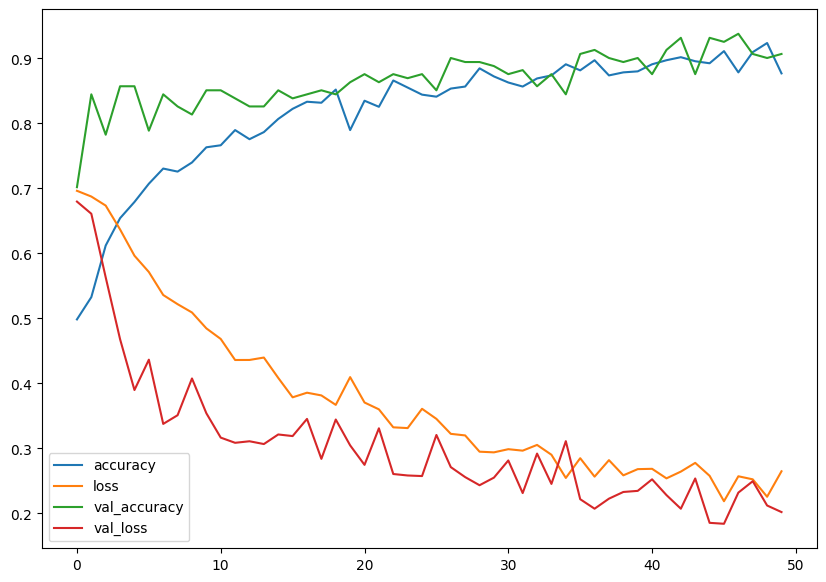

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [ ]:
model_3.evaluate(test_data)

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8924 - loss: 0.2095


[0.20203174650669098, 0.9068322777748108]

In [ ]:
print(model_3.output_shape)
print(train_data.class_indices)


(None, 1)
{'bye': 0, 'hello': 1}


In [ ]:
!wget https://thumbs.dreamstime.com/b/young-indian-man-wearing-t-shirt-standing-over-isolated-white-background-waiving-saying-hello-happy-smiling-friendly-welcome-228193112.jpg

--2025-11-05 07:35:23--  https://thumbs.dreamstime.com/b/young-indian-man-wearing-t-shirt-standing-over-isolated-white-background-waiving-saying-hello-happy-smiling-friendly-welcome-228193112.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28042 (27K) [image/jpeg]
Saving to: ‘young-indian-man-wearing-t-shirt-standing-over-isolated-white-background-waiving-saying-hello-happy-smiling-friendly-welcome-228193112.jpg.1’

young-indian-man-we 100%[===================>]  27.38K  --.-KB/s    in 0s      

2025-11-05 07:35:23 (196 MB/s) - ‘young-indian-man-wearing-t-shirt-standing-over-isolated-white-background-waiving-saying-hello-happy-smiling-friendly-welcome-228193112.jpg.1’ saved [28042/28042]



In [ ]:
!wget https://c8.alamy.com/comp/2F467KE/photo-of-young-woman-confident-serious-soldier-army-officer-show-hand-salute-sign-isolated-over-white-color-background-2F467KE.jpg

--2025-11-05 07:35:25--  https://c8.alamy.com/comp/2F467KE/photo-of-young-woman-confident-serious-soldier-army-officer-show-hand-salute-sign-isolated-over-white-color-background-2F467KE.jpg
Resolving c8.alamy.com (c8.alamy.com)... 108.156.144.56, 108.156.144.61, 108.156.144.90, ...
Connecting to c8.alamy.com (c8.alamy.com)|108.156.144.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘photo-of-young-woman-confident-serious-soldier-army-officer-show-hand-salute-sign-isolated-over-white-color-background-2F467KE.jpg.1’

photo-of-young-woma     [ <=>                ]  98.21K  --.-KB/s    in 0.003s  

Last-modified header invalid -- time-stamp ignored.
2025-11-05 07:35:25 (33.1 MB/s) - ‘photo-of-young-woman-confident-serious-soldier-army-officer-show-hand-salute-sign-isolated-over-white-color-background-2F467KE.jpg.1’ saved [100569]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


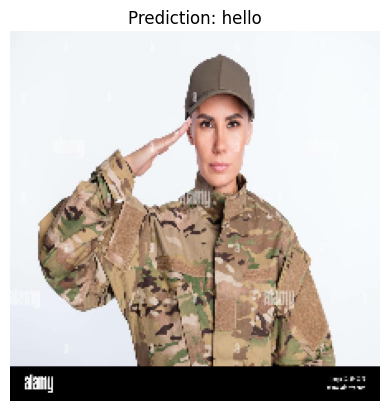

In [ ]:
pred_and_plot(model_3,"photo-of-young-woman-confident-serious-soldier-army-officer-show-hand-salute-sign-isolated-over-white-color-background-2F467KE.jpg")

In [ ]:
!wget https://i.ytimg.com/vi/4e14uNAn2Ao/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBGCGw2PeyXxC0SPpW5hVZvjkuE1Q

--2025-11-05 07:40:55--  https://i.ytimg.com/vi/4e14uNAn2Ao/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD
Resolving i.ytimg.com (i.ytimg.com)... 74.125.200.119, 74.125.130.119, 74.125.68.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|74.125.200.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54148 (53K) [image/jpeg]
Saving to: ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’

hq720.jpg?sqp=-oaym 100%[===================>]  52.88K  --.-KB/s    in 0s      

2025-11-05 07:40:55 (105 MB/s) - ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’ saved [54148/54148]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


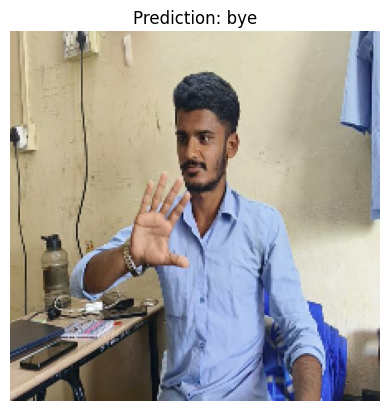

In [ ]:
pred_and_plot(model_3,"/content/bye_1759914590_26.jpg")

In [ ]:
from tensorflow.keras.models import load_model
model_3.save("Sign_language_HB_model.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#save model to drive
model_3.save("/content/drive/MyDrive/Sign_language_HB_model.h5")

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Sign_language_HB_model.h5")